In [45]:
from BGN_Cho import *
import matplotlib.pyplot as plt
from IPython.display import clear_output


bgn = BGN_Cho(tmax=300, pd=False)
rewards = []
r1s = []
r2s = []
r3s = []
r4s = []
sgis_sums = []
eis = []
amp = -1
for i in range(1):
    bgn.reset()
    terminated = 0
    while terminated != 1:
        observation, reward, terminated, truncated, info = bgn.step()
        rewards.append(reward)
        r1s.append(info['r1'])
        r2s.append(info['r2'])
        r3s.append(info['r3'])
        r4s.append(info['r4'])
        sgis = scipy.io.loadmat('C:/Users/ncart/Programming/DBS/Matlab_Impl/bgn_vars.mat')['sgis']
        sgis_sums.append(np.sum(np.mean(np.abs(np.fft.fft(sgis)), axis=0)[1:20]))
        eis.append(bgn.calculate_ei())
    clear_output()
    print(i)

0


In [46]:


eng.calculateEI(matlab.double(bgn.smc_spike_times.tolist()), 1100*100, nargout=1)


1.0

In [ ]:
print(np.mean(eis), np.std(eis))
print(np.mean(sgis_sums), np.std(sgis_sums))


0.10400000000000001 0.27637655472199524
1341.6861007371945 109.27953033579234


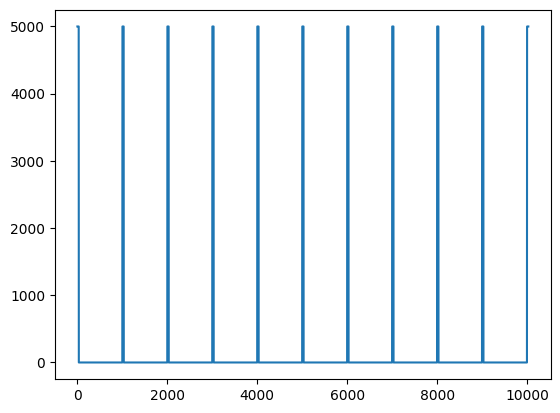

In [5]:
plt.plot(bgn.dbs)

In [10]:
print(np.mean(rewards), np.std(rewards))

-0.13885953894187555 0.03199527053858848


In [ ]:
print(np.mean(rewards), np.std(rewards))
print(np.mean(r2s), np.std(r2s))
print(np.mean(r3s), np.std(r3s))

-0.48063073009096585 0.07598509410680879
0.0 0.0
0.6866153287013798 0.10855013443829829


In [ ]:
print(np.mean(rewards), np.std(rewards))
print(np.mean(r2s), np.std(r2s))
print(np.mean(r3s), np.std(r3s))

0.15787743022820577 0.05450654619918053


In [7]:
print(np.mean(rewards), np.std(rewards))
print(np.mean(r2s), np.std(r2s))
print(np.mean(r3s), np.std(r3s))

-0.4290664254185894 0.02653285541583525
0.20530465167595652 2.7755575615628914e-17
0.5249643284511465 0.03790407916547892


3016.3015209511445


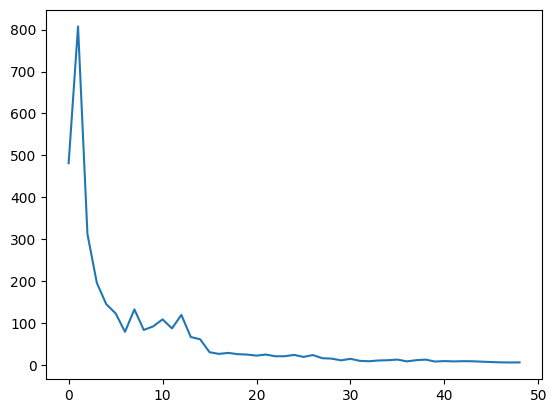

In [33]:
sgis = scipy.io.loadmat('C:/Users/ncart/Programming/DBS/Matlab_Impl/bgn_vars.mat')['sgis']
sgis_fft = np.mean(np.abs(np.fft.fft(sgis)), axis=0)[1:50]
plt.plot(sgis_fft)
print(np.sum(np.mean(np.abs(np.fft.fft(sgis)), axis=0)[1:20]))

2324.2406429754064


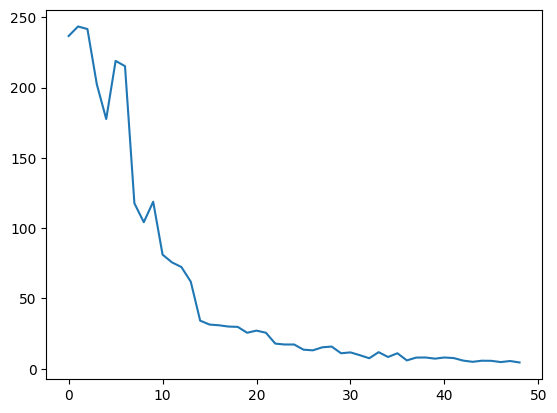

In [35]:
sgis = scipy.io.loadmat('C:/Users/ncart/Programming/DBS/Matlab_Impl/bgn_vars.mat')['sgis']
sgis_fft = np.mean(np.abs(np.fft.fft(sgis)), axis=0)[1:50]
plt.plot(sgis_fft)
print(np.sum(np.mean(np.abs(np.fft.fft(sgis)), axis=0)[1:20]))

In [1]:
from BGN_MC import *
import matplotlib.pyplot as plt
from stable_baselines3 import TD3 

bgn = BGN_MC(tmax=1100, pd=True)
model = TD3.load('../models/TD3_SGi_biphase/1000.zip', env=bgn)
eis = []
sgis_sums = []

for i in range(5):
    observation = bgn.reset()[0]
    terminated = 0
    while terminated != 1:
        action = model.predict(observation)[0]
        observation, reward, terminated, truncated, info = bgn.step(action)
        print(action, reward, info['r2'], info['r3'])
        sgis = scipy.io.loadmat('C:/Users/ncart/Programming/DBS/Matlab_Impl/bgn_vars.mat')['sgis']
        sgis_sums.append(np.sum(np.mean(np.abs(np.fft.fft(sgis)), axis=0)[1:20]))
        eis.append(bgn.calculate_ei())
    print(i)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
[0.39331973 0.30447888] -0.3225812746270802 0.689996799826622 0.1496798510037664
[0.4628613  0.28223598] -0.21305305818533637 0.717883750796318 -0.02451432657277262
[0.5101521  0.47776043] -0.16802612923178378 0.7526466757059098 -0.10708942205015778
[0.37133515 0.09582925] -0.2792500065865497 0.6650046318769455 0.09771841821459874
[0.44894433 0.209306  ] -0.2844878364173175 0.7064992904663085 0.08589421098249823
[0.51458406 0.5164025 ] -0.22584640567258069 0.7574284136295318 -0.024309833365984527
[0.42209828 0.11768293] -0.24324711961513376 0.6882179886102676 0.033849063617423764
[0.43430865 0.16059756] -0.32676121565175226 0.6966259926557541 0.1527072029439867
[0.43888474 0.1556356 ] -0.31718523706186597 0.6981986820697784 0.13788479235226014
[0.4412334 0.1663518] -0.2909050019437943 0.7000005781650542 0.09838943666320148
0
[0.4282763 0.2838118] -0.3937126811284113 0.70330331325531 0.2480229718922237
[0.49594

In [8]:
print(np.mean(eis), np.std(eis))
print(np.mean(sgis_sums), np.std(sgis_sums))

0.083 0.25369469840735737
1237.940689946444 254.31328494605833


In [2]:
print(np.mean(eis), np.std(eis))
print(np.mean(sgis_sums), np.std(sgis_sums))

0.187 0.40358518307787267
1231.9843722467785 252.73086628925097
